<h1 align="center">FINAL PROJECT</h1>

<h2>1. Data and Problem Introduction</h2>

<span style="font-weight:bold">a) Data</span>
- Name: Gender recognition by Voice  
- Source: https://www.kaggle.com/primaryobjects/voicegender

<span style="font-weight:bold">b) Problem</span>
- Using classification to classfify the voice which belongs to mail or female

<h2>2. Data Dictionary</h2>

<span style="font-weight:bold">a) Voice Gender</span>
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

<span style="font-weight:bold">b) Feature description</span>
The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

<h2>3. Import libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

<h2>4. Reading data and description</h2>

In [2]:
rawData = pd.read_csv("voice.csv")
rawData.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2749,0.184703,0.033982,0.181739,0.165217,0.203478,0.038261,2.342371,8.635110,0.851414,0.234382,...,0.184703,0.160521,0.049180,0.275862,1.303977,0.023438,8.062500,8.039062,0.073185,female
2780,0.193175,0.041085,0.184851,0.169598,0.226978,0.057380,2.474983,10.441904,0.871411,0.295865,...,0.193175,0.159269,0.047431,0.271186,1.469809,0.023438,8.015625,7.992188,0.116022,female
2678,0.188374,0.030364,0.187723,0.167129,0.205545,0.038416,2.220191,7.645145,0.834743,0.172725,...,0.188374,0.165029,0.050000,0.268156,0.655772,0.023438,3.304688,3.281250,0.146916,female
2310,0.232794,0.038225,0.243396,0.205365,0.265263,0.059898,1.924879,6.347851,0.844692,0.154248,...,0.232794,0.185199,0.051118,0.277457,1.178961,0.023438,11.015625,10.992188,0.084632,female
1631,0.204621,0.059611,0.224467,0.195783,0.237641,0.041858,3.000446,14.702111,0.896610,0.416068,...,0.204621,0.132917,0.016129,0.275862,0.403993,0.007812,5.140625,5.132812,0.103288,female
2511,0.195878,0.032909,0.194231,0.181154,0.212692,0.031538,2.316270,7.863145,0.840807,0.229675,...,0.195878,0.172145,0.049485,0.277457,1.812500,0.023438,8.718750,8.695312,0.093261,female
1900,0.195740,0.072019,0.207813,0.183750,0.250568,0.066818,2.655036,14.541175,0.915646,0.471817,...,0.195740,0.182011,0.018307,0.275862,0.260216,0.054688,0.781250,0.726562,0.278438,female
558,0.111337,0.075083,0.095585,0.047542,0.172154,0.124611,1.792152,8.022700,0.962835,0.735872,...,0.111337,0.084689,0.015671,0.192771,0.195312,0.007812,0.734375,0.726562,0.247909,male
95,0.107009,0.081313,0.102788,0.025164,0.188941,0.163778,24.705118,714.696895,0.891348,0.576778,...,0.107009,0.075907,0.016000,0.222222,0.007812,0.007812,0.007812,0.000000,0.000000,male
1659,0.109148,0.091542,0.071577,0.024263,0.195321,0.171057,1.899222,6.472859,0.948618,0.678843,...,0.109148,0.190846,0.030189,0.275862,0.359375,0.007812,0.718750,0.710938,0.354396,female


In [3]:
# Shape of data
print("Data shape: ", rawData.shape)

Data shape:  (3168, 21)


In [4]:
# Keys
keys = np.asanyarray(rawData.keys())
print(keys)

['meanfreq' 'sd' 'median' 'Q25' 'Q75' 'IQR' 'skew' 'kurt' 'sp.ent' 'sfm'
 'mode' 'centroid' 'meanfun' 'minfun' 'maxfun' 'meandom' 'mindom' 'maxdom'
 'dfrange' 'modindx' 'label']


In [5]:
# Overview Data
print(rawData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

#### Check null valus

In [6]:
rawData.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

#### -> All values are not null

#### Check duplicated values

In [7]:
rawData.duplicated().sum()

2

In [8]:
rawData.drop_duplicates(inplace=True)
rawData.shape

(3166, 21)

#### -> All duplicated values are removed

In [9]:
rawData.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,0.180886,0.057130,0.185593,0.140440,0.224748,0.084308,3.140895,36.587139,0.895144,0.408348,0.165248,0.180886,0.142811,0.036801,0.258837,0.828868,0.052631,5.044220,4.991589,0.173751
std,0.029916,0.016656,0.036354,0.048687,0.023636,0.042790,4.241768,134.969236,0.044988,0.177476,0.077212,0.029916,0.032314,0.019225,0.030085,0.525009,0.063301,3.517226,3.516072,0.119484
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163649,0.041942,0.169578,0.111086,0.208740,0.042538,1.649353,5.666817,0.861823,0.258126,0.118008,0.163649,0.116990,0.018223,0.253968,0.419640,0.007812,2.070312,2.041016,0.099726
50%,0.184814,0.059162,0.190016,0.140255,0.225668,0.094280,2.197623,8.327893,0.901823,0.396472,0.186530,0.184814,0.140585,0.046110,0.271186,0.765625,0.023438,4.992188,4.945312,0.139357
75%,0.199118,0.067023,0.210588,0.175931,0.243640,0.114168,2.932527,13.649803,0.928717,0.533795,0.221070,0.199118,0.169605,0.047904,0.277457,1.176824,0.070312,7.005859,6.992188,0.209141
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<h2>5. Data exploration and visualization</h2>

#### Evaluate relationship between 'label' and other features

In [10]:
# Check unique values of feature 'label'
rawData['label'].unique()

array(['male', 'female'], dtype=object)

In [11]:
# Create a copied Data
myData = rawData.copy(deep=True)
# Encode values of esrb_rating key
le = preprocessing.LabelEncoder()
myData['label'] = le.fit(myData['label'].unique()).transform(myData['label'])
myData.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [12]:
myData['label'].unique()

array([1, 0])

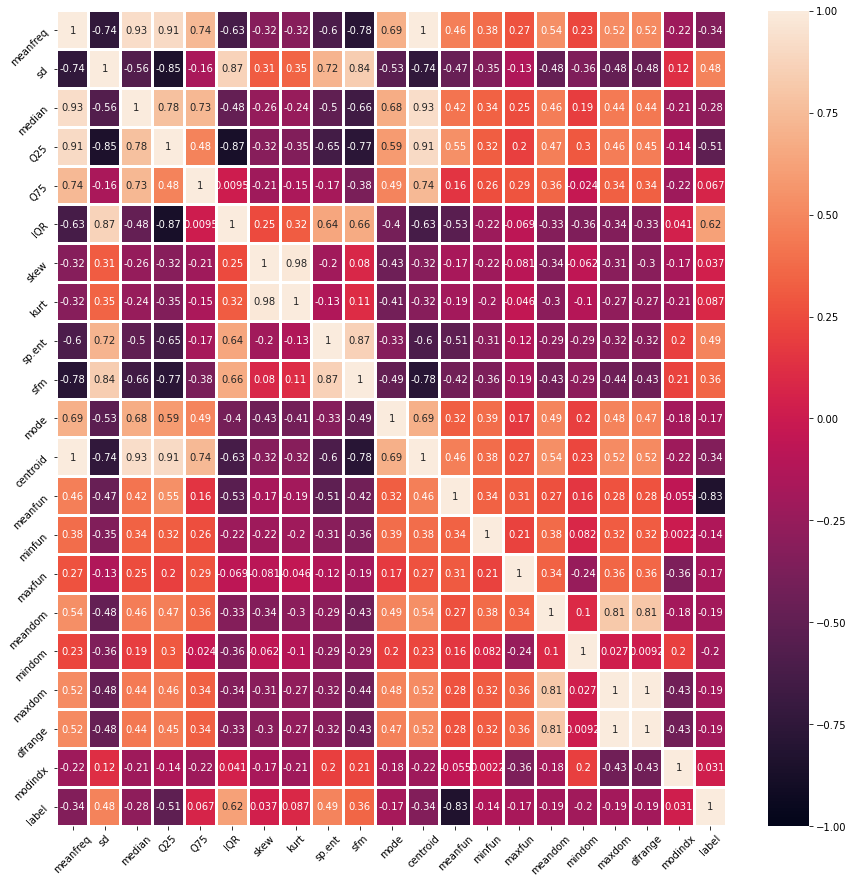

In [13]:
# Correlation matrix
corrMatrix = myData.corr()
plt.figure(figsize=(15, 15))
sn.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True, linewidths=2)
plt.xticks(rotation='45')
plt.yticks(rotation='45')
plt.show()

In [14]:
corr_label = corrMatrix[['label']].copy(deep=True)
corr_label

,label
meanfreq,-0.337660
sd,0.479468
median,-0.284387
Q25,-0.511390
Q75,0.066791
IQR,0.618766
skew,0.036621
kurt,0.087220
sp.ent,0.490893
sfm,0.358223


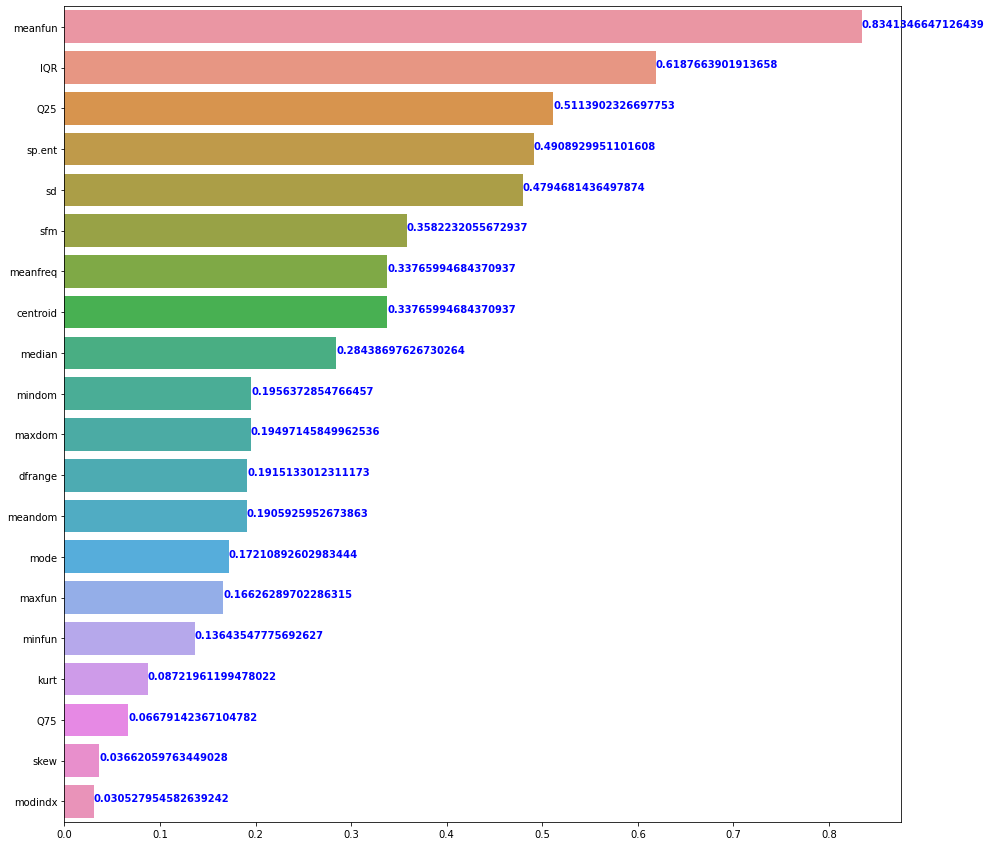

In [15]:
# Correlation between 'label' and other features
corr_label = corr_label.drop(index=['label'], axis=0, inplace=False)
corr_label[['label']] = abs(corr_label[['label']].values)
corr_label = corr_label[['label']].sort_values(by=['label'], axis=0, ascending=False, inplace=False)

# Bar plot
corr_values, corr_indexs = corr_label['label'].values, corr_label.index
plt.figure(figsize=(15,15))
ax = sn.barplot(x=corr_values, y=corr_indexs)
for i, v in enumerate(corr_values):
    ax.text(v, i, str(v), color='blue', fontweight='bold')
plt.show()

#### Select important features

In [16]:
TrueKeys = [x for x in corr_label[['label']].index if corr_label[['label']].loc[x].values[0] >= 0.1]
TrueKeys

['meanfun',
 'IQR',
 'Q25',
 'sp.ent',
 'sd',
 'sfm',
 'meanfreq',
 'centroid',
 'median',
 'mindom',
 'maxdom',
 'dfrange',
 'meandom',
 'mode',
 'maxfun',
 'minfun']

In [17]:
TrueKeys.append('label')
myData = myData.drop(columns=[x for x in myData.keys() if x not in TrueKeys], axis=1)
myData.head(5)

,meanfreq,sd,median,Q25,IQR,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,label
0,0.059781,0.064241,0.032027,0.015071,0.075122,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.073252,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,1
2,0.077316,0.083829,0.036718,0.008701,0.123207,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,1
3,0.151228,0.072111,0.158011,0.096582,0.111374,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,1
4,0.135120,0.079146,0.124656,0.078720,0.127325,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,1


In [18]:
myData.shape

(3166, 17)

#### Check equality of label's values

Male:  [1583]
Female:  [1583]


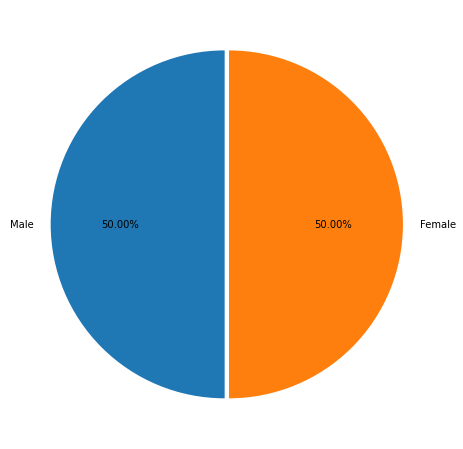

In [19]:
# Proportion of each class using pie chart

outcome = myData[['label']]
male = outcome.loc[outcome.label == 1].count()
female = outcome.loc[outcome.label == 0].count()
print("Male: ", male.values)
print("Female: ", female.values)

values = []
values.append(male.values[0])
values.append(female.values[0])
labels = ['Male', 'Female']
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, startangle=90, autopct='%1.2f%%', explode=(0, 0.025))
plt.show()

#### -> There are equal number of male and female label

<h2>6. Data prepation</h2>

#### Create data set X and y

In [20]:
X = myData.drop('label', axis=1).values
X[0:10]

array([[0.05978098, 0.06424127, 0.03202691, 0.01507149, 0.07512195,
        0.89336942, 0.49191777, 0.        , 0.05978098, 0.08427911,
        0.01570167, 0.27586207, 0.0078125 , 0.0078125 , 0.0078125 ,
        0.        ],
       [0.06600874, 0.06731003, 0.04022873, 0.01941387, 0.07325232,
        0.89219324, 0.51372384, 0.        , 0.06600874, 0.10793655,
        0.01582591, 0.25      , 0.00901442, 0.0078125 , 0.0546875 ,
        0.046875  ],
       [0.0773155 , 0.08382942, 0.03671846, 0.00870106, 0.12320696,
        0.84638909, 0.47890498, 0.        , 0.0773155 , 0.09870626,
        0.01565558, 0.27118644, 0.00799006, 0.0078125 , 0.015625  ,
        0.0078125 ],
       [0.15122809, 0.07211059, 0.15801119, 0.09658173, 0.11137352,
        0.96332246, 0.7272318 , 0.08387819, 0.15122809, 0.08896485,
        0.01779755, 0.25      , 0.2014974 , 0.0078125 , 0.5625    ,
        0.5546875 ],
       [0.13512039, 0.0791461 , 0.12465623, 0.07872022, 0.12732471,
        0.97195508, 0.78356806, 

In [21]:
y = myData['label'].values
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Normalize data

In [22]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-4.04876256,  0.42701439, -4.22489401, -2.57536967, -0.2147114 ,
        -0.03944648,  0.47095196, -2.14052431, -4.04876256, -1.81160868,
        -1.0977045 ,  0.56598384, -1.56413506, -0.70812961, -1.43215231,
        -1.41987354],
       [-3.8405579 ,  0.61129081, -3.99924689, -2.48616672, -0.25841143,
        -0.06559465,  0.59383891, -2.14052431, -3.8405579 , -1.07938593,
        -1.09124056, -0.29379851, -1.56184537, -0.70812961, -1.41882294,
        -1.40653979],
       [-3.46255325,  1.60326589, -4.09582101, -2.70623374,  0.90921075,
        -1.08389132,  0.39761911, -2.14052431, -3.46255325, -1.36507313,
        -1.10010239,  0.41054296, -1.56379681, -0.70812961, -1.42993075,
        -1.41765125],
       [-0.99152733,  0.89956015, -0.75883605, -0.90095238,  0.63262015,
         1.51571724,  1.7970513 , -1.05401541, -0.99152733, -1.66658005,
        -0.98866599, -0.29379851, -1.19515968, -0.70812961, -1.27442142,
        -1.26209088],
       [-1.5300358 ,  1.32203658, -1

#### Split train-test data set

In [23]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=3)
print("Shape of train data set: ", train_x.shape, train_y.shape)
print("Shape of test data set: ", test_x.shape, test_y.shape)

Shape of train data set:  (2532, 16) (2532,)
Shape of test data set:  (634, 16) (634,)


<h2>7. Modeling</h2>

#### Random forest

In [24]:
myRF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, random_state=3)
myRF.fit(train_x, train_y)

# Predict
predictRF = myRF.predict(test_x)
print(predictRF[0:20])
print(test_y[0:20])
print()

# Evaluation
trainACS_RF = metrics.accuracy_score(train_y,  myRF.predict(train_x))
testACS_RF = metrics.accuracy_score(test_y,  predictRF)
print("RandomForest Train data set's Accuracy: ", trainACS_RF)
print("RandomForest Test data set's Accuracy: ", testACS_RF)

[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]

RandomForest Train data set's Accuracy:  0.9834123222748815
RandomForest Test data set's Accuracy:  0.9747634069400631


#### KNN with K = 4

In [25]:
myKNN_1 = KNeighborsClassifier(n_neighbors=4)
myKNN_1.fit(train_x, train_y)

# Predict
predictKNN_1 = myKNN_1.predict(test_x)
print(predictKNN_1[0:20])
print(test_y[0:20])
print()

# Evaluation
trainACS_KNN_1 = metrics.accuracy_score(train_y,  myKNN_1.predict(train_x))
testACS_KNN_1 = metrics.accuracy_score(test_y,  predictKNN_1)

print("KNN Train data set's Accuracy (K=4): ", trainACS_KNN_1)
print("KNN Test data set's Accuracy (K=4): ", testACS_KNN_1)

[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]

KNN Train data set's Accuracy (K=4):  0.985781990521327
KNN Test data set's Accuracy (K=4):  0.9810725552050473


#### KNN with K = 5

In [26]:
myKNN_2 = KNeighborsClassifier(n_neighbors=5)
myKNN_2.fit(train_x, train_y)

# Predict
predictKNN_2 = myKNN_2.predict(test_x)
print(predictKNN_2[0:20])
print(test_y[0:20])
print()

# Evaluation
trainACS_KNN_2 = metrics.accuracy_score(train_y,  myKNN_2.predict(train_x))
testACS_KNN_2 = metrics.accuracy_score(test_y,  predictKNN_2)

print("KNN Train data set's Accuracy (K=5): ", trainACS_KNN_2)
print("KNN Test data set's Accuracy (K=5): ", testACS_KNN_2)

[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]

KNN Train data set's Accuracy (K=5):  0.9861769352290679
KNN Test data set's Accuracy (K=5):  0.973186119873817


#### KNN with K = 6

In [27]:
myKNN_3 = KNeighborsClassifier(n_neighbors=6)
myKNN_3.fit(train_x, train_y)

# Predict
predictKNN_3 = myKNN_3.predict(test_x)
print(predictKNN_3[0:20])
print(test_y[0:20])
print()

# Evaluation
trainACS_KNN_3 = metrics.accuracy_score(train_y,  myKNN_3.predict(train_x))
testACS_KNN_3 = metrics.accuracy_score(test_y,  predictKNN_3)

print("KNN Train data set's Accuracy (K=6): ", trainACS_KNN_3)
print("KNN Test data set's Accuracy (K=6): ", testACS_KNN_3)

[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]

KNN Train data set's Accuracy (K=6):  0.9826224328593997
KNN Test data set's Accuracy (K=6):  0.9700315457413249


#### Naive-Bayes

In [28]:
myNB = GaussianNB()
myNB.fit(train_x, train_y)

# Predict
predictNB = myNB.predict(test_x)
print(predictNB[0:20])
print(test_y[0:20])
print()

# Evaluation
trainACS_NB = metrics.accuracy_score(train_y,  myNB.predict(train_x))
testACS_NB = metrics.accuracy_score(test_y,  predictNB)

print("Naive-Bayes Train data set's Accuracy: ", trainACS_NB)
print("Naive-Bayes Test data set's Accuracy: ", testACS_NB)

[0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]

Naive-Bayes Train data set's Accuracy:  0.910347551342812
Naive-Bayes Test data set's Accuracy:  0.9069400630914827


#### Perceptron

In [29]:
myPerceptron = Perceptron(tol=1e-3, random_state=3)
myPerceptron.fit(train_x, train_y)

# Predict
predictPerceptron = myPerceptron.predict(test_x)
print(predictPerceptron[0:20])
print(test_y[0:20])
print()

# Evaluation
trainACS_Perceptron = metrics.accuracy_score(train_y,  myPerceptron.predict(train_x))
testACS_Perceptron = metrics.accuracy_score(test_y,  predictPerceptron)

print("Perceptron Train data set's Accuracy: ", trainACS_Perceptron)
print("Perceptron Test data set's Accuracy: ", testACS_Perceptron)

[0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]

Perceptron Train data set's Accuracy:  0.9565560821484992
Perceptron Test data set's Accuracy:  0.9589905362776026


#### Logistic regression

In [30]:
myLR = LogisticRegression(solver='liblinear')
myLR.fit(train_x, train_y)

# Predict
predictLR = myLR.predict(test_x)
print(predictLR[0:20])
print(test_y[0:20])
print()

# Evaluation
trainACS_LR = metrics.accuracy_score(train_y,  myLR.predict(train_x))
testACS_LR =  metrics.accuracy_score(test_y,  predictLR)

print("LogisticRegression Train data set's Accuracy: ", trainACS_LR)
print("LogisticRegression Test data set's Accuracy: ", testACS_LR)

[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]

LogisticRegression Train data set's Accuracy:  0.9751184834123223
LogisticRegression Test data set's Accuracy:  0.973186119873817


#### SVM

In [31]:
mySVM = svm.SVC(kernel='rbf')
mySVM.fit(train_x, train_y)

# Predict
predictSVM = mySVM.predict(test_x)
print(predictSVM[0:20])
print(test_y[0:20])
print()

# Evaluation
trainACS_SVM = metrics.accuracy_score(train_y,  mySVM.predict(train_x))
testACS_SVM =  metrics.accuracy_score(test_y,  predictSVM)

print("SVM Train data set's Accuracy: ", trainACS_SVM)
print("SVM Test data set's Accuracy: ", testACS_SVM)

[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0]

SVM Train data set's Accuracy:  0.9845971563981043
SVM Test data set's Accuracy:  0.9810725552050473


<h2>8. Ranking model's accuracy_score</h2>

#### Train data set's accuracy score

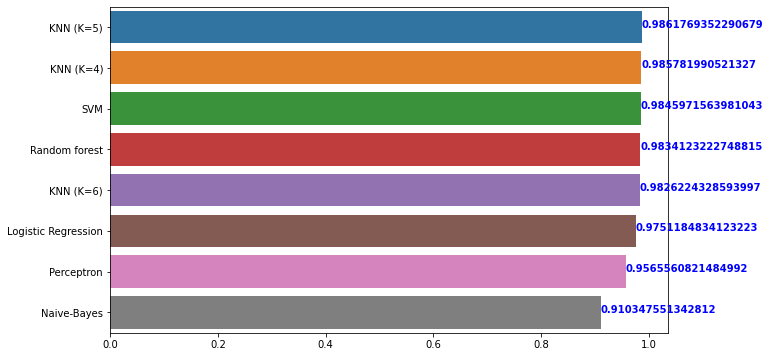

In [32]:
indexs = ["Random forest", "KNN (K=4)", "KNN (K=5)", "KNN (K=6)", "Naive-Bayes", "Perceptron", "Logistic Regression", "SVM"]
accTrain = pd.DataFrame({"Accuracy_Score": [trainACS_RF, trainACS_KNN_1, trainACS_KNN_2, trainACS_KNN_3, trainACS_NB, trainACS_Perceptron, trainACS_LR, trainACS_SVM]}, index=indexs)
accTrain = accTrain[['Accuracy_Score']].sort_values(by=['Accuracy_Score'], axis=0, ascending=False, inplace=False)

# Bar plot
bar_values, bar_indexs = accTrain['Accuracy_Score'].values, accTrain.index
plt.figure(figsize=(10,6))
ax = sn.barplot(x=bar_values, y=bar_indexs)
for i, v in enumerate(bar_values):
    ax.text(v, i, str(v), color='blue', fontweight='bold')
plt.show()

#### Test data set's accuracy score

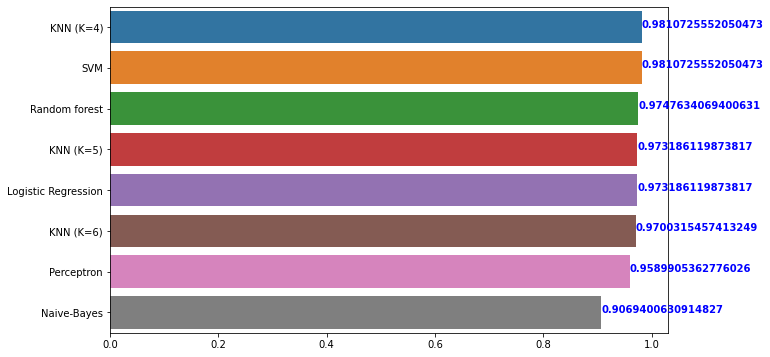

In [33]:
indexs = ["Random forest", "KNN (K=4)", "KNN (K=5)", "KNN (K=6)", "Naive-Bayes", "Perceptron", "Logistic Regression", "SVM"]
accTest = pd.DataFrame({"Accuracy_Score": [testACS_RF, testACS_KNN_1, testACS_KNN_2, testACS_KNN_3, testACS_NB, testACS_Perceptron, testACS_LR, testACS_SVM]}, index=indexs)
accTest = accTest[['Accuracy_Score']].sort_values(by=['Accuracy_Score'], axis=0, ascending=False, inplace=False)

# Bar plot
bar_values, bar_indexs = accTest['Accuracy_Score'].values, accTest.index
plt.figure(figsize=(10,6))
ax = sn.barplot(x=bar_values, y=bar_indexs)
for i, v in enumerate(bar_values):
    ax.text(v, i, str(v), color='blue', fontweight='bold')
plt.show()

#### -> Select SVM and KNN (K=4) to evaluate by confusion matrix

<h2>9. Using confusion matrix to evaluate model</h2>

In [34]:
# Confusion matrix function
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#### KNN with K = 4

Normalized confusion matrix
[[0.98 0.02]
 [0.02 0.98]]


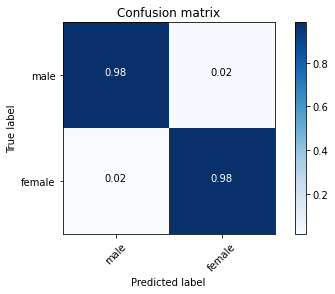

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, predictKNN_1, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['male', 'female'], normalize=True,  title='Confusion matrix')

#### SVM

Normalized confusion matrix
[[0.97 0.03]
 [0.01 0.99]]


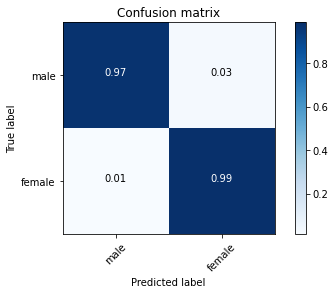

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, predictSVM, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['male', 'female'], normalize=True,  title='Confusion matrix')

#### -> Choose KNN (K=4) to save model and deploy

<h2>10. Save model</h2>

In [121]:
import pickle 

knnPickle = open('myModelFile', 'wb') 

# source, destination 
pickle.dump(myKNN_1, knnPickle)                      

In [122]:
# Load model
loaded_model = pickle.load(open('myModelFile', 'rb'))

In [135]:
# load the model from disk
X_test = rawData.iloc[3000].drop(['label', 'kurt', 'Q75', 'modindx', 'skew'])
X_test = np.asanyarray(X_test.values)
X_test = X_test.reshape((1, 16))

result = loaded_model.predict(X_test)
result

array([0])

In [136]:
X_test

array([[0.172729706706792, 0.0638464713087431, 0.167575757575758,
        0.140353535353535, 0.0825505050505051, 0.942913807387307,
        0.60547508616802, 0.145656565656566, 0.172729706706792,
        0.152388796438368, 0.0260416666666667, 0.256410256410256,
        1.076416015625, 0.400390625, 1.7529296875, 1.3525390625]],
      dtype=object)

In [143]:
X_test_2 = np.asanyarray([0.172729706706792, 0.0638464713087431, 0.167575757575758,
        0.140353535353535, 0.0825505050505051, 0.942913807387307,
        0.60547508616802, 0.145656565656566, 0.172729706706792,
        0.152388796438368, 0.0260416666666667, 0.256410256410256,
        1.076416015625, 0.400390625, 1.7529296875, 1.3525390625], dtype='object')
X_test_2 = X_test_2.reshape((1, 16))

result = loaded_model.predict(X_test_2)
result

array([0])

In [139]:
X_test_2.

array([[0.172729706706792, 0.0638464713087431, 0.167575757575758,
        0.140353535353535, 0.0825505050505051, 0.942913807387307,
        0.60547508616802, 0.145656565656566, 0.172729706706792,
        0.152388796438368, 0.0260416666666667, 0.256410256410256,
        1.076416015625, 0.400390625, 1.7529296875, 1.3525390625]],
      dtype=object)

In [140]:
res2 = myKNN_1.predict(X_test_2)
res2

array([0])

In [75]:
rawData.shape

(3166, 21)